In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set()

In [4]:
# Load Dataset

df = pd.read_csv("/Users/farahalmujaljel/Desktop/IAU/ML/personal_carbon_footprint_behavior.csv")

# Display first 5 rows
df.head(7)

,user_id,day_type,transport_mode,distance_km,electricity_kwh,renewable_usage_pct,food_type,screen_time_hours,waste_generated_kg,eco_actions,carbon_footprint_kg,carbon_impact_level
0,1,Weekend,EV,1.55,6.12,0,Non-Veg,2.4,0.70,1,11.03,High
1,1,Weekend,Walk,10.04,4.50,0,Mixed,4.1,0.54,1,7.44,Medium
2,1,Weekday,Walk,15.27,2.81,0,Mixed,4.0,0.51,1,6.01,Medium
3,1,Weekend,Walk,0.50,10.16,0,Mixed,6.3,0.73,0,12.70,High
4,1,Weekend,Walk,3.60,5.02,50,Mixed,5.1,0.64,0,6.33,Medium
5,1,Weekday,EV,7.77,5.14,50,Veg,4.2,0.73,1,4.89,Low
6,1,Weekend,Bike,6.87,7.14,75,Mixed,2.6,0.45,0,5.50,Low


In [5]:
##  Check Missing Values
print(df.isna().sum())

user_id                0
day_type               0
transport_mode         0
distance_km            0
electricity_kwh        0
renewable_usage_pct    0
food_type              0
screen_time_hours      0
waste_generated_kg     0
eco_actions            0
carbon_footprint_kg    0
carbon_impact_level    0
dtype: int64


In [6]:
## Check duplicate rows
df.duplicated()[df.duplicated()==True]

Series([], dtype: bool)

In [7]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (1400, 12) 

number of rows:  1400
number of columns:  12


In [8]:
# Statistical summary
df.describe(include='all')

,user_id,day_type,transport_mode,distance_km,electricity_kwh,renewable_usage_pct,food_type,screen_time_hours,waste_generated_kg,eco_actions,carbon_footprint_kg,carbon_impact_level
count,1400.000000,1400,1400,1400.000000,1400.000000,1400.000000,1400,1400.000000,1400.000000,1400.000000,1400.000000,1400
unique,NaN,2,5,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,3
top,NaN,Weekday,Bike,NaN,NaN,NaN,Non-Veg,NaN,NaN,NaN,NaN,Medium
freq,NaN,721,291,NaN,NaN,NaN,474,NaN,NaN,NaN,NaN,869
mean,100.500000,NaN,NaN,9.106071,5.951443,31.589286,NaN,5.521786,0.703200,1.144286,7.980236,NaN
std,57.754936,NaN,NaN,4.734692,1.993266,30.598496,NaN,2.018918,0.236415,1.019066,2.657858,NaN
min,1.000000,NaN,NaN,0.500000,2.000000,0.000000,NaN,2.000000,0.100000,0.000000,1.790000,NaN
25%,50.750000,NaN,NaN,5.662500,4.530000,0.000000,NaN,3.800000,0.550000,0.000000,6.080000,NaN
50%,100.500000,NaN,NaN,9.180000,5.925000,25.000000,NaN,5.550000,0.705000,1.000000,7.835000,NaN
75%,150.250000,NaN,NaN,12.510000,7.290000,50.000000,NaN,7.300000,0.860000,2.000000,9.830000,NaN


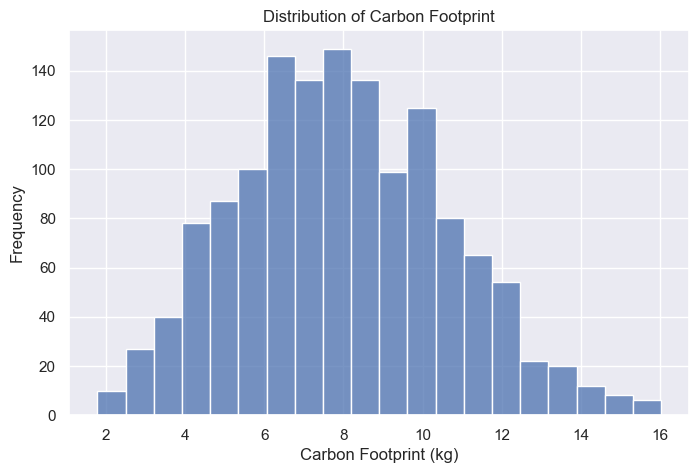

In [14]:
## Carbon Analysis
df.columns = df.columns.str.strip()

plt.figure(figsize=(8,5))
sns.histplot(df['carbon_footprint_kg'], bins=20)

plt.title("Distribution of Carbon Footprint")
plt.xlabel("Carbon Footprint (kg)")
plt.ylabel("Frequency")

plt.show()

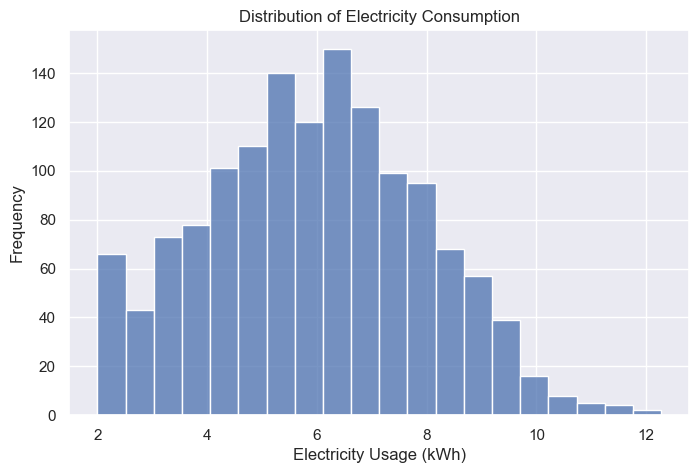

In [16]:
## Distribution of Electricity
plt.figure(figsize=(8,5))
sns.histplot(df['electricity_kwh'], bins=20)

plt.title("Distribution of Electricity Consumption")
plt.xlabel("Electricity Usage (kWh)")
plt.ylabel("Frequency")

plt.show()

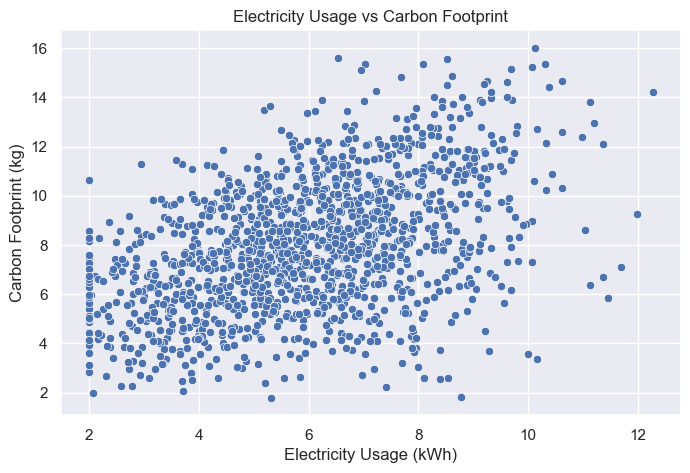

In [17]:
## Bivariate Analysis

plt.figure(figsize=(8,5))

sns.scatterplot(
    x=df['electricity_kwh'],
    y=df['carbon_footprint_kg']
)

plt.title("Electricity Usage vs Carbon Footprint")
plt.xlabel("Electricity Usage (kWh)")
plt.ylabel("Carbon Footprint (kg)")

plt.show()


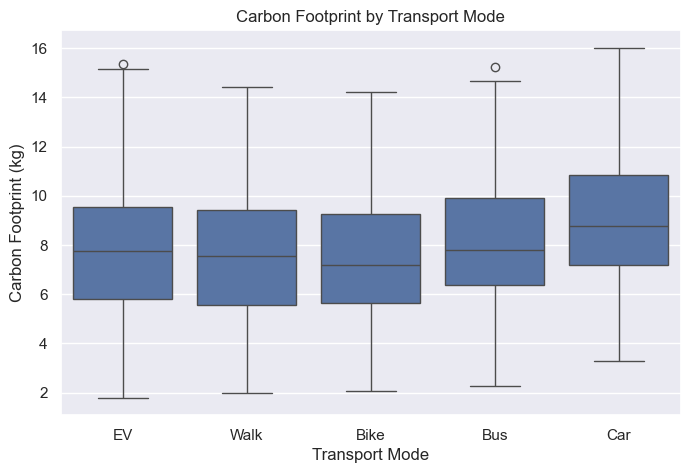

In [18]:
plt.figure(figsize=(8,5))

sns.boxplot(
    x=df['transport_mode'],
    y=df['carbon_footprint_kg']
)

plt.title("Carbon Footprint by Transport Mode")
plt.xlabel("Transport Mode")
plt.ylabel("Carbon Footprint (kg)")

plt.show()


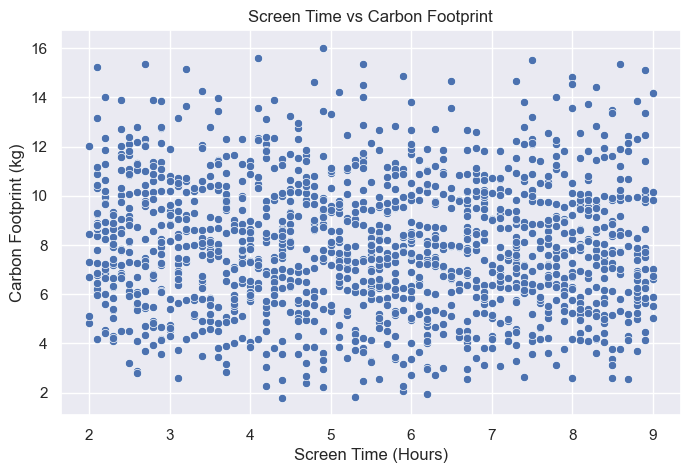

In [19]:


plt.figure(figsize=(8,5))

sns.scatterplot(
    x=df['screen_time_hours'],
    y=df['carbon_footprint_kg']
)

plt.title("Screen Time vs Carbon Footprint")
plt.xlabel("Screen Time (Hours)")
plt.ylabel("Carbon Footprint (kg)")

plt.show()


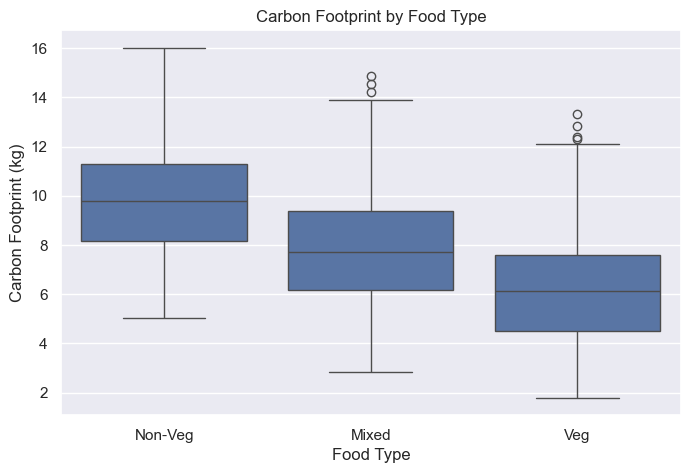

In [20]:
plt.figure(figsize=(8,5))

sns.boxplot(
    x=df['food_type'],
    y=df['carbon_footprint_kg']
)

plt.title("Carbon Footprint by Food Type")
plt.xlabel("Food Type")
plt.ylabel("Carbon Footprint (kg)")

plt.show()


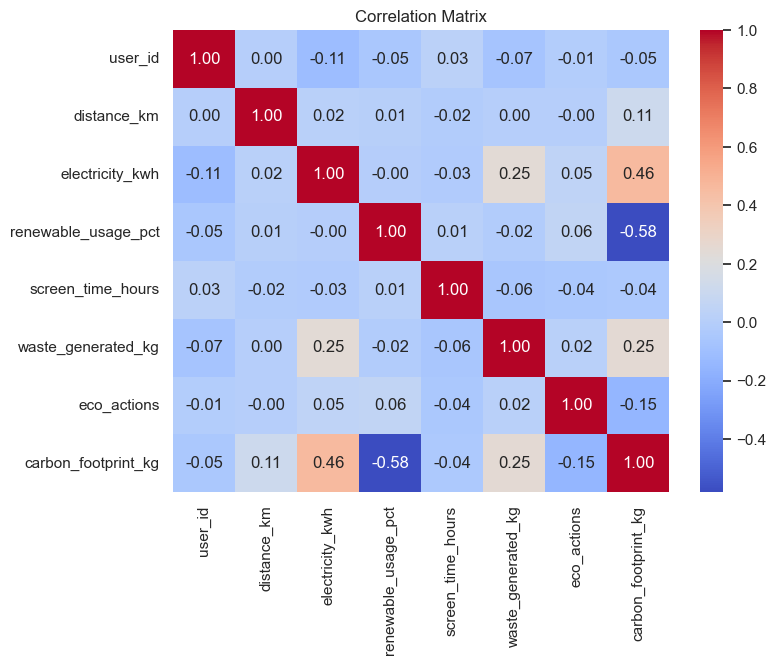

In [22]:
## Correlation Matrix
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include='number')

corr_matrix = numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Matrix")
plt.show()


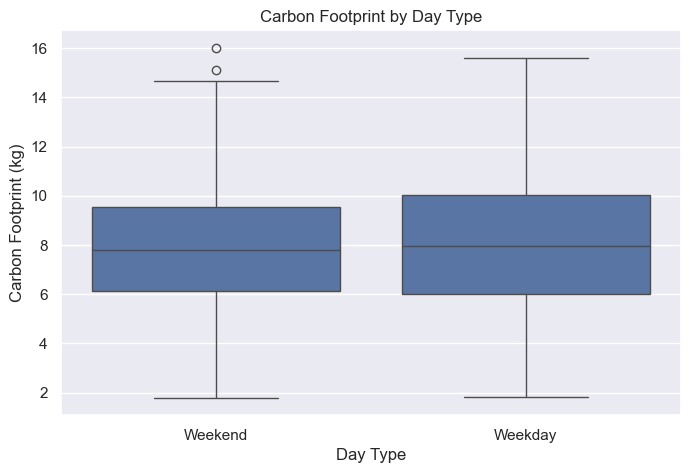

In [23]:
## Time-Based Analysis
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))

sns.boxplot(
    x=df['day_type'],
    y=df['carbon_footprint_kg']
)

plt.title("Carbon Footprint by Day Type")
plt.xlabel("Day Type")
plt.ylabel("Carbon Footprint (kg)")

plt.show()


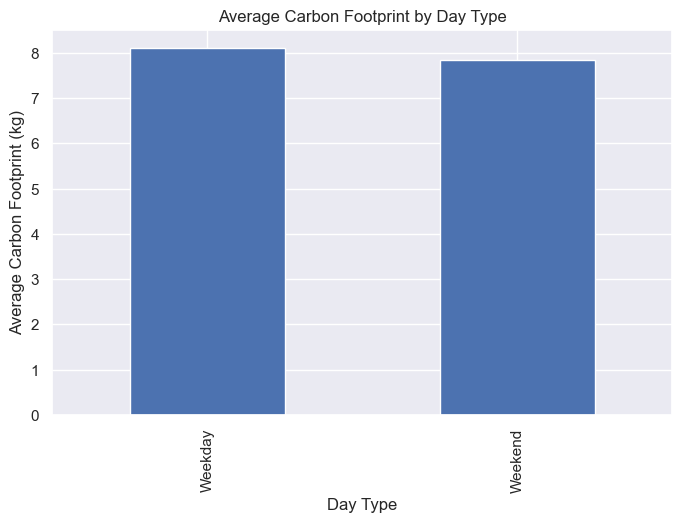

In [24]:
avg_emission = df.groupby('day_type')['carbon_footprint_kg'].mean()

avg_emission.plot(kind='bar', figsize=(8,5))

plt.title("Average Carbon Footprint by Day Type")
plt.xlabel("Day Type")
plt.ylabel("Average Carbon Footprint (kg)")

plt.show()
